<a href="https://colab.research.google.com/github/katrinag2004/DS-4002/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("Ishotdogasandwich.csv")

# Print first 5 rows
print(df.head())



            Timestamp  What year are you in? Is hotdog a sandwich?
0  8/29/2025 17:17:57                      4                   Yes
1  8/29/2025 18:33:08                      3                   Yes
2  8/29/2025 18:33:08                      4                   Yes
3  8/29/2025 18:33:29                      3                   Yes
4  8/29/2025 18:33:41                      1                    No


**Reasoning**:
Group the data by year and hotdog response, count the occurrences, reset the index, and rename the count column.



In [ ]:
grouped_counts = df.groupby(['What year are you in?', 'Is hotdog a sandwich?'])['Timestamp'].count().reset_index()
grouped_counts.rename(columns={'Timestamp': 'Count'}, inplace=True)
display(grouped_counts)

,What year are you in?,Is hotdog a sandwich?,Count
0,1,No,8
1,2,No,30
2,2,Yes,10
3,3,No,34
4,3,Yes,11
5,4,No,78
6,4,Yes,36


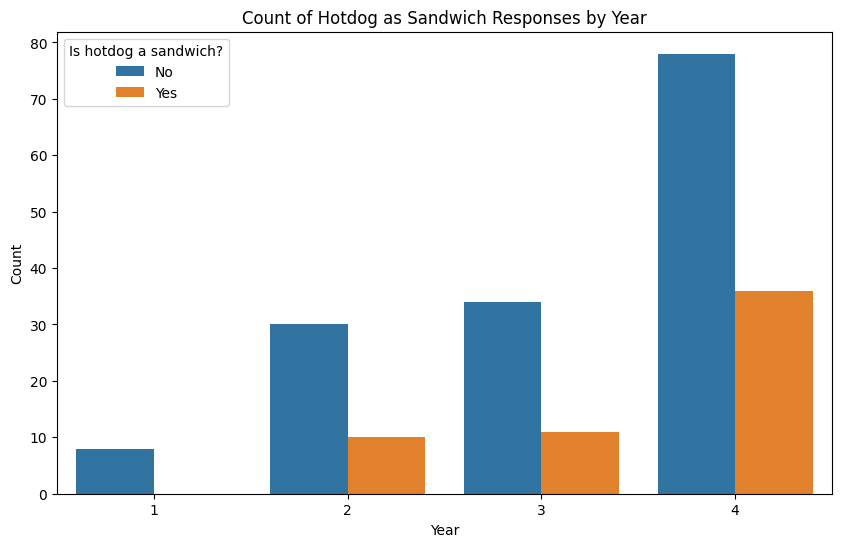

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts, x='What year are you in?', y='Count', hue='Is hotdog a sandwich?')
plt.title('Count of Hotdog as Sandwich Responses by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Is hotdog a sandwich?')
plt.xticks(rotation=0)
plt.show()

## Summary:

### Data Analysis Key Findings

*   In year 4, there were 78 'No' responses and 36 'Yes' responses to the hotdog as a sandwich question.

### Insights or Next Steps

*   The bar chart visually represents the distribution of opinions on whether a hotdog is a sandwich across different academic years.
*   Further analysis could explore if there is a statistically significant difference in opinions between different years.


**Reasoning**:
Group the data by the hotdog question response, count the occurrences, reset the index, and rename the count column.



In [ ]:
grouped_counts_overall = df.groupby('Is hotdog a sandwich?')['Timestamp'].count().reset_index()
grouped_counts_overall.rename(columns={'Timestamp': 'Count'}, inplace=True)
display(grouped_counts_overall)

,Is hotdog a sandwich?,Count
0,No,150
1,Yes,57


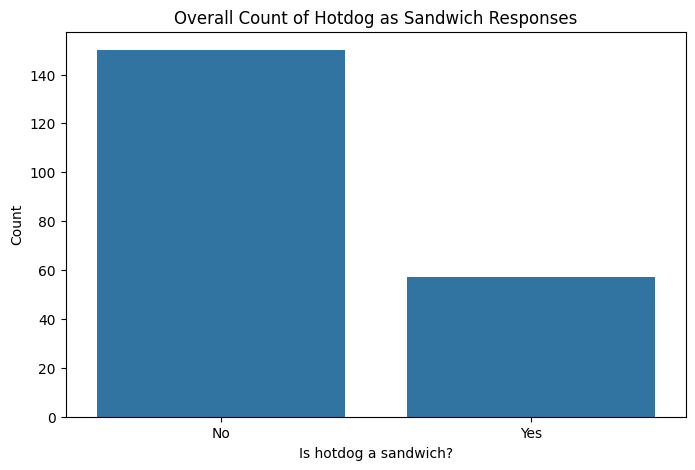

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_counts_overall, x='Is hotdog a sandwich?', y='Count')
plt.title('Overall Count of Hotdog as Sandwich Responses')
plt.xlabel('Is hotdog a sandwich?')
plt.ylabel('Count')
plt.show()

## Summary:

### Data Analysis Key Findings

*   There were 150 'No' responses to the question "Is hotdog a sandwich?".
*   There were 57 'Yes' responses to the question "Is hotdog a sandwich?".

### Insights or Next Steps

*   The majority of respondents do not consider a hotdog a sandwich.
*   Further analysis could explore if there are demographic or regional differences in responses.


In [ ]:
grouped_counts_year = df.groupby('What year are you in?')['Timestamp'].count().reset_index()
grouped_counts_year.rename(columns={'Timestamp': 'Total Count'}, inplace=True)
display(grouped_counts_year)

,What year are you in?,Total Count
0,1,8
1,2,40
2,3,45
3,4,114


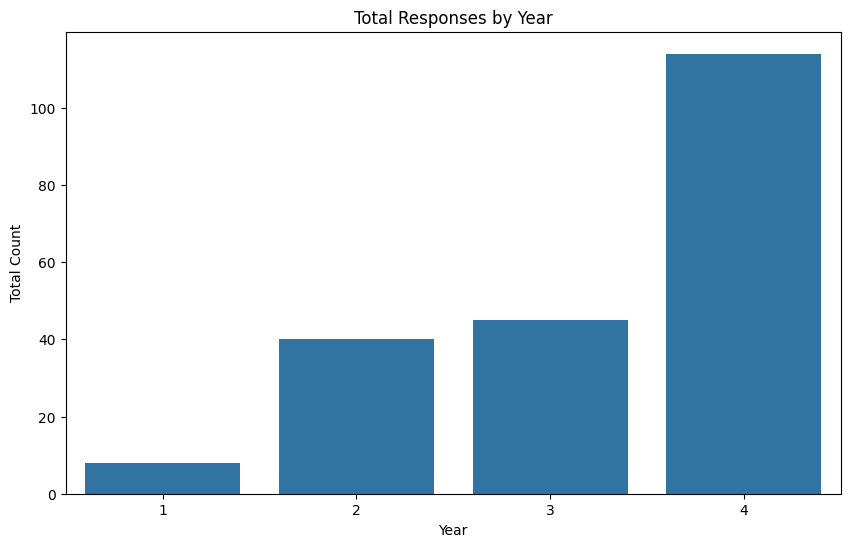

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts_year, x='What year are you in?', y='Total Count')
plt.title('Total Responses by Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
import pandas as pd

df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
grouped_counts_year = df.groupby('Year')['Timestamp'].count().reset_index()
grouped_counts_year.rename(columns={'Timestamp': 'Total Count'}, inplace=True)
display(grouped_counts_year)


,Year,Total Count
0,2025,207


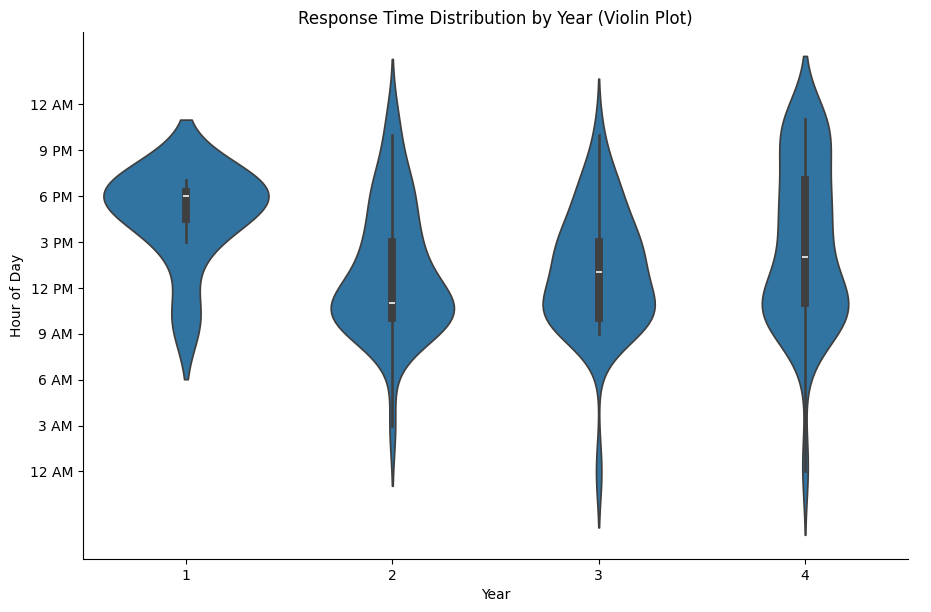

In [27]:
df['What year are you in?'] = df['What year are you in?'].astype(str)
year_order = ['1', '2', '3', '4']

# Use catplot with kind='violin' to show the distribution of data points with ordering
g = sns.catplot(data=df, x='What year are you in?', y='Hour', order=year_order, height=6, aspect=1.5, kind='violin')
plt.title('Response Time Distribution by Year (Violin Plot)')
plt.xlabel('Year')
plt.ylabel('Hour of Day')
plt.xticks(rotation=0)

# Format y-axis labels as time (0 to 24 hours) with 3-hour intervals, with 24 labeled as 12 AM
def format_hour_label(h):
    if h == 24:
        return '12 AM'
    elif h == 0:
        return '12 AM'
    elif h < 12:
        return f'{h} AM'
    elif h == 12:
        return '12 PM'
    else:
        return f'{h-12} PM'

g.ax.set_yticks(range(0, 25, 3)) # Set ticks at intervals of 3 hours
g.ax.set_yticklabels([format_hour_label(h) for h in range(0, 25, 3)])

plt.show()

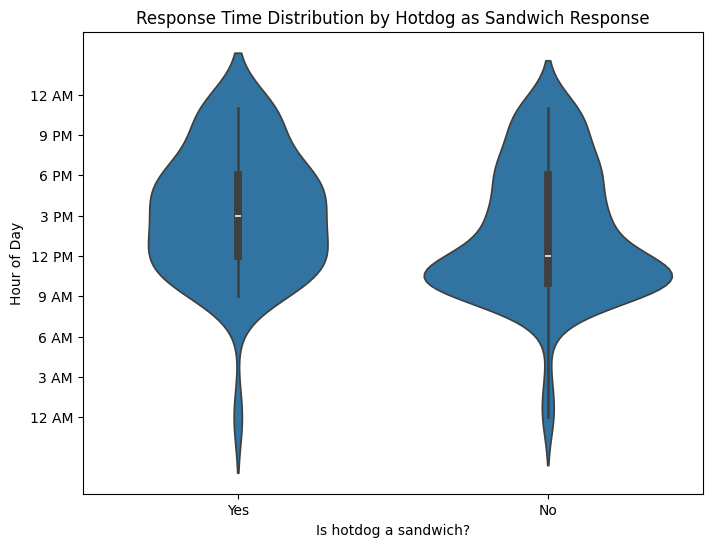

In [28]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=df, x='Is hotdog a sandwich?', y='Hour')
plt.title('Response Time Distribution by Hotdog as Sandwich Response')
plt.xlabel('Is hotdog a sandwich?')
plt.ylabel('Hour of Day')

# Format y-axis labels as time (0 to 24 hours) with 3-hour intervals, with 24 labeled as 12 AM
def format_hour_label(h):
    if h == 24:
        return '12 AM'
    elif h == 0:
        return '12 AM'
    elif h < 12:
        return f'{h} AM'
    elif h == 12:
        return '12 PM'
    else:
        return f'{h-12} PM'

ax.set_yticks(range(0, 25, 3)) # Set ticks at intervals of 3 hours
ax.set_yticklabels([format_hour_label(h) for h in range(0, 25, 3)])

plt.show()